# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Permitir que o google drive acesse os arquivos externos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/[01] Ciência de Dados/EBAC/[Módulo 11] Desenvolvimento de aplicações com Python/Árvores II (Parte I árvore de regressão) [1]/housing.csv')

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [ ]:
# Verificar o dataframe
df_raw.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [ ]:
# Preparar os dados
print(df_raw.isnull().sum())
print('-')

df = df_raw.dropna()
print(df.isnull().sum())
print('-')

# Verificar tipos de dados
print(df.dtypes)
print('-')

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
-
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
-
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
-


In [ ]:
# Ajustar os dados da coluna ocean_proximity

print(df['ocean_proximity'].unique())

conversao_num = {
    'NEAR BAY':0,
    '<1H OCEAN':1,
    'INLAND':2,
    'NEAR OCEAN':3,
    'ISLAND':4
}

df.loc[:,'ocean_proximity'] = df['ocean_proximity'].map(conversao_num)

print(df['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
[0 1 2 3 4]


In [ ]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

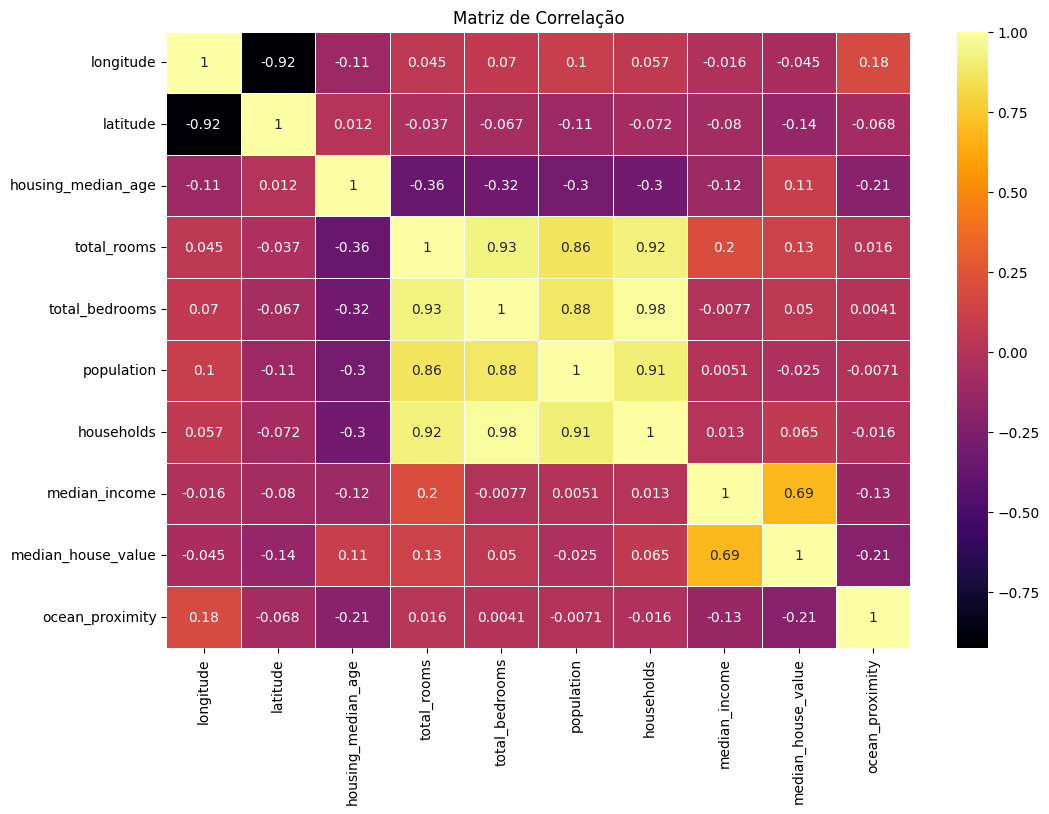

In [ ]:
# Calcular e visualizar a matriz de correlação
matriz_cor = df.corr()

# Plotar heatmap
plt.figure(figsize=(12,8))
sns.heatmap(matriz_cor, annot=True, cmap='inferno', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# Visualizando a estrutura da correlação
matriz_cor

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.181198
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.067980
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.206178
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.015917
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.004081
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.007061
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.015561
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.129415
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.212014
ocean_proximity,0.181198,-0.067980,-0.206178,0.015917,0.004081,-0.007061,-0.015561,-0.129415,-0.212014,1.000000


## Resposta:
A variável *median_house_value* parece ter o melhor potencial preditivo.

### 3. Separe os dados em validação e teste

In [ ]:
# Dividir os dados em treino e teste

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [ ]:
# Configurando as arvores
regr_8 = DecisionTreeRegressor(max_depth=8)
regr_2 = DecisionTreeRegressor(max_depth=2)

# Treinando os modelos
regr_8.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [ ]:
# Construir a predição
y_pred_reg_8 = regr_8.predict(X_train)
y_pred_reg_2 = regr_2.predict(X_train)

# Cálculo do R2
R2_reg_8 = regr_8.score(X_train, y_train)
R2_reg_2 = regr_2.score(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

# Cálculo do MSE
mse_reg_8 = mean_squared_error(y_train, y_pred_reg_8)
mse_reg_2 = mean_squared_error(y_train, y_pred_reg_2)

In [ ]:
print(f'O R2 para profundidade 8 foi: {R2_reg_8:.2f}.')
print(f'O R2 para profundidade 2 foi: {R2_reg_2:.2f}.')
print('-------------------------------------------')
print(f'O MSE para profundidade 8 foi: {mse_reg_8:.2f}.')
print(f'O MSE para profundidade 2 foi: {mse_reg_2:.2f}.')

O R2 para profundidade 8 foi: 0.77.
O R2 para profundidade 2 foi: 0.45.
-------------------------------------------
O MSE para profundidade 8 foi: 3005683863.46.
O MSE para profundidade 2 foi: 7301485444.05.


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

## Resposta:
A árvore com profundidade 8 apresenta um R2 mais alto e um MSE mais baixo em comparação com a árvore de profundidade 2. Isso significa que a árvore de profundidade 8 é mais adequada pois explica melhor a variabilidade dos dados e tem erros de previsão menores.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

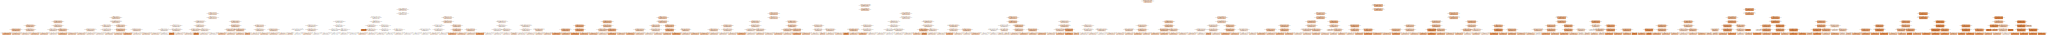

In [ ]:
import graphviz

dot_data = tree.export_graphviz(regr_8,
                               feature_names=X.columns,
                               filled=True)
graph = graphviz.Source(dot_data, format='png')
graph

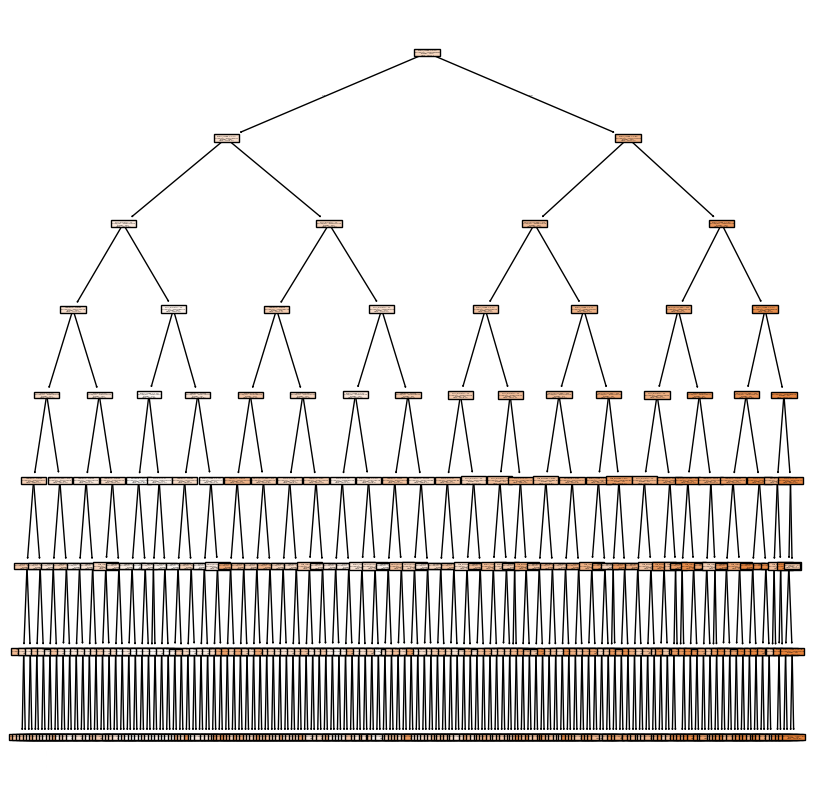

In [ ]:
# Visualizando a arvore
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_8,
                    feature_names=X.columns,
                    filled=True)

## Resposta:
A variável **median_income** é a mais importante, pois é a primeira variável que aparece na raiz, indicando que ela tem muita influência na segmentação dos dados.